# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url) # Submit request
btc_content = btc_response_data.content # Store response using 'content' attribute
btc_data = btc_response_data.json() # Format data as JSON

btc_price = btc_data['data']['1']['quotes']['USD']['price'] # Fetch current BTC price
print(btc_price)

42520.0


In [7]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url) # Submit request
eth_content = eth_response_data.content # Store response using 'content' attribute
eth_data = eth_response_data.json() # Format data as JSON

eth_price = eth_data['data']['1027']['quotes']['USD']['price'] #Fetch current ETH price
print(eth_price)

3232.91


In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51024.00
The current value of your 5.3 ETH is $17134.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-07 04:00:00+00:00,105.38,105.51,105.13,105.26,7921117,25631,105.278761,AGG
2022-04-07 04:00:00+00:00,445.67,450.69,443.53,448.77,77538519,628673,447.098209,SPY


In [12]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-07 04:00:00+00:00  105.38  105.51  105.13  105.26  7921117   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-07 04:00:00+00:00       25631  105.278761  445.67  450.69  443.53   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-07 04:00:00+00:00  448.77  77538519      628673  447.098209

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $105.26
Current SPY closing price: $448.77


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22438.50
The current value of your 200 AGG shares is $21052.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Total Crypto Assets
total_crypto = my_eth_value + my_btc_value

#Total Stock Assets
total_stock = my_spy_value + my_agg_value

# Consolidate financial assets data
df_savings = {
    "amount": [total_crypto, total_stock]
}

# Set Labels
labels = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(df_savings, index=labels)

# Display savings DataFrame
display(df_savings)

,amount
crypto,68158.423
shares,43490.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

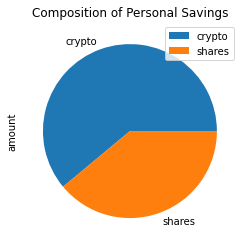

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_stock

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are at least ${emergency_fund} away from your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
MC_ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

MC_ticker_data.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-04-26 04:00:00+00:00,417.42,418.22,416.8111,417.61,52076360,295872,417.505200,SPY
2021-04-27 04:00:00+00:00,417.97,418.14,416.3000,417.52,50324187,296302,417.481280,SPY
2021-04-28 04:00:00+00:00,417.84,419.01,416.9000,417.40,50692843,330050,417.742098,SPY
2021-04-29 04:00:00+00:00,420.38,420.72,416.4400,420.06,77056617,443399,418.825111,SPY
2021-04-30 04:00:00+00:00,417.67,418.54,416.3400,417.30,84731942,478844,417.651995,SPY


In [22]:
# Get 5 years' worth of historical data for SPY and AGG
MC_ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = MC_ticker_data[MC_ticker_data['symbol']=="AGG"].drop('symbol', axis=1)
SPY = MC_ticker_data[MC_ticker_data['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)
    

In [24]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kyleplathe/Desktop/School/UofM-VIRT-FIN-PT-03-2022-U-LOL/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002766,1.003394,1.003470,0.993605,1.001958,0.998197,0.994710,0.990509,0.999259,0.988601,...,1.000959,0.992310,1.010798,0.999553,0.990394,1.001975,1.012453,0.987909,0.991803,0.995710
2,1.007288,0.995573,1.002640,0.993743,1.008341,0.995640,0.990119,0.979041,1.000396,0.975656,...,0.995138,0.985785,1.004398,0.993048,1.001094,0.995485,1.018141,1.012162,0.986295,1.000512
3,1.017943,0.993556,1.001614,0.992664,1.004050,0.999954,0.990157,0.984924,1.006169,0.969011,...,0.995780,0.993945,1.015890,1.001732,1.001693,0.987735,1.025029,1.003823,0.994071,0.995516
4,1.013901,0.991293,1.003503,0.994570,1.000830,0.995310,0.997112,0.978356,1.015528,0.976793,...,0.988350,0.991980,1.009486,1.012700,1.009836,0.986491,1.038015,1.000677,1.004360,1.002357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.821469,17.239688,9.617702,9.635816,18.552322,7.158600,26.902591,15.341749,12.064824,13.546414,...,4.257975,72.704976,74.826481,26.004525,5.628312,16.867073,17.037354,37.948609,56.233477,6.775928
7557,8.857480,17.205832,9.555189,9.569884,18.729745,7.198957,26.665726,15.312466,12.033691,13.532770,...,4.245758,73.310806,75.671123,26.167662,5.654592,16.618552,16.866611,37.993080,55.587765,6.797853
7558,8.797317,17.006424,9.608322,9.624507,18.642824,7.170397,26.550582,15.332314,12.198781,13.488766,...,4.241191,73.824270,75.682333,26.202367,5.663147,16.460046,16.835718,38.199965,55.583337,6.871548
7559,8.783686,17.059265,9.693338,9.677010,18.647152,7.103732,26.486883,15.363879,12.239275,13.453586,...,4.252380,74.222356,75.938768,25.848539,5.684074,16.520344,16.827297,38.465134,55.629138,6.880790


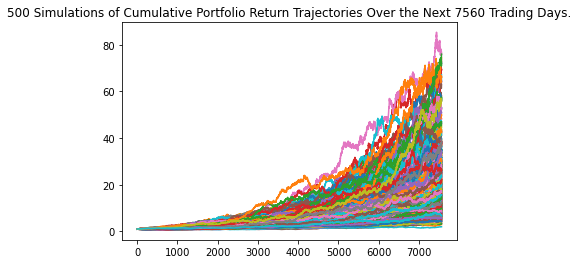

In [26]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

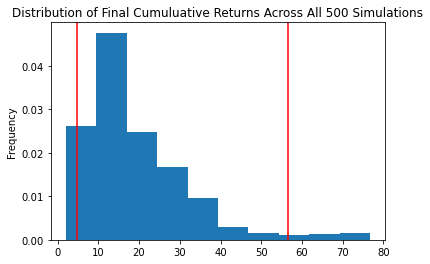

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             19.335780
std              12.933146
min               1.996624
25%              10.711962
50%              15.682544
75%              25.117523
max              76.757277
95% CI Lower      4.759569
95% CI Upper     56.560813
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95191.39 and $1131216.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $142787.08 and $1696824.4


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kyleplathe/Desktop/School/UofM-VIRT-FIN-PT-03-2022-U-LOL/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010769,1.015174,1.003728,1.006545,0.996171,1.013366,1.010066,0.995194,0.998456,1.005778,...,1.004370,1.002753,1.000497,1.005084,1.001616,0.993378,0.991809,0.993733,0.995116,1.007936
2,1.011177,1.011874,1.013421,1.016241,0.997189,1.020481,1.015712,0.994961,0.983882,1.018120,...,1.009498,1.002099,0.993927,1.008809,1.000391,1.004132,0.987900,0.985672,1.000751,1.025032
3,1.009622,0.993391,1.004042,1.026254,1.002305,1.027644,1.014130,0.991527,0.984392,1.010532,...,1.003098,1.002299,0.993360,0.997830,1.001050,1.008769,0.984834,0.990230,0.995560,1.027824
4,1.001051,0.990033,1.007487,1.034651,1.002155,1.026807,1.011991,0.990658,0.983834,1.011893,...,1.008105,0.994419,1.000461,1.003648,0.998159,1.024515,0.979948,0.976920,0.993518,1.030623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.387908,2.587615,1.529920,1.549444,1.515691,1.277354,1.539164,2.306906,1.926571,1.088234,...,1.514329,1.257336,1.509647,1.988322,1.023567,1.756363,1.482411,1.208152,1.158302,1.334134
1257,1.381913,2.591240,1.516136,1.543594,1.511670,1.283514,1.519237,2.295204,1.936822,1.083716,...,1.522154,1.256855,1.504134,1.998649,1.010623,1.757881,1.487837,1.209446,1.169404,1.327591
1258,1.383527,2.595991,1.521602,1.553696,1.525550,1.296831,1.516569,2.296391,1.923167,1.083106,...,1.523820,1.253742,1.514524,2.001727,1.010550,1.745647,1.483026,1.198685,1.165677,1.336178
1259,1.378471,2.620751,1.520357,1.547845,1.513700,1.309350,1.515799,2.289990,1.906737,1.084968,...,1.529236,1.247111,1.516050,1.998457,1.009431,1.754325,1.500820,1.199960,1.152236,1.357071


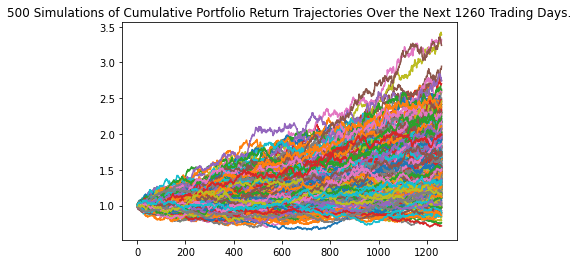

In [34]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

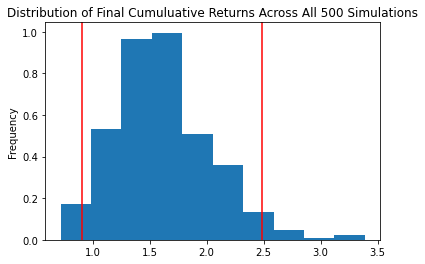

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.610126
std               0.419611
min               0.716045
25%               1.320962
50%               1.544954
75%               1.846236
max               3.388657
95% CI Lower      0.904892
95% CI Upper      2.485130
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54293.54 and $149107.78


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kyleplathe/Desktop/School/UofM-VIRT-FIN-PT-03-2022-U-LOL/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992375,0.996069,0.995881,1.010037,0.993703,0.993547,0.998232,0.995560,1.004005,1.017256,...,1.007464,1.002869,1.005396,0.991373,0.997316,1.002054,0.986878,1.005928,1.001786,0.992650
2,0.985715,0.992196,0.986631,1.019274,0.996459,0.989093,1.005282,0.995036,0.999874,1.016597,...,1.002739,0.997000,1.011341,0.990722,0.992840,0.999027,0.986527,1.016281,1.007038,0.990167
3,0.993747,0.989877,0.983336,1.039070,0.982649,0.987316,1.001122,1.008640,1.001550,1.022786,...,0.996101,1.007286,1.021264,0.984870,0.988747,1.005429,0.988526,1.009204,1.006350,0.992674
4,1.000669,1.001353,0.966791,1.044296,0.981571,0.970526,1.002760,1.012221,0.998912,1.029385,...,1.006277,1.010761,1.023643,0.984610,0.989342,1.009115,0.978630,1.012202,1.015492,0.997751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.434758,1.720588,1.868771,1.895865,2.150112,2.732811,3.840988,1.487162,1.420355,2.997271,...,2.435516,2.931074,1.403706,2.196922,1.233040,2.864584,1.403012,2.872870,1.687405,1.340633
2517,2.429284,1.715372,1.869571,1.898504,2.166043,2.708908,3.879279,1.502119,1.436177,2.997810,...,2.410195,2.943249,1.405382,2.210518,1.227750,2.836336,1.387879,2.845636,1.685312,1.355071
2518,2.427571,1.717770,1.882231,1.878869,2.183170,2.722359,3.889152,1.485221,1.446982,2.975508,...,2.413264,2.927910,1.391391,2.212529,1.240380,2.851457,1.389895,2.834822,1.675792,1.348680
2519,2.429808,1.719177,1.881426,1.891236,2.174498,2.742810,3.927637,1.492056,1.445406,2.955155,...,2.389543,2.902466,1.399577,2.218245,1.237015,2.801210,1.391128,2.835444,1.659836,1.367505


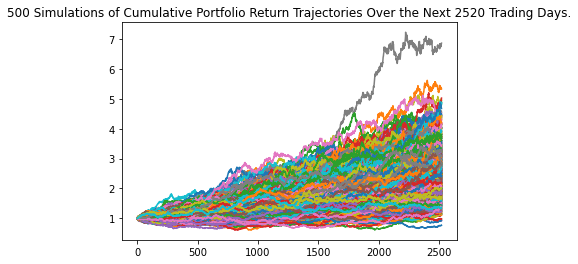

In [40]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

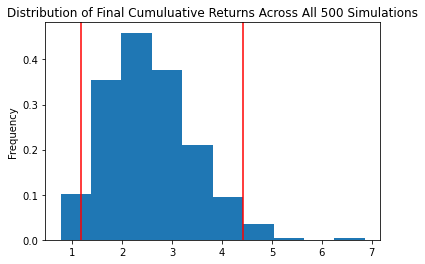

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.559393
std               0.860832
min               0.765999
25%               1.932784
50%               2.469210
75%               3.090002
max               6.862719
95% CI Lower      1.175925
95% CI Upper      4.414684
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70555.51 and $264881.06
